In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/MyDrive/RobaeeDataset.zip

In [ ]:
!pip install hazm

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dirpath = "./RobaeeDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,از حلقهٔ گوش از دلم باخبر است در حلقهٔ او دل ...,moulavi
1,آنجا بنشین که همنشین مردانند تا دود کدورت ترا...,moulavi
2,دانیکه چه میگوید این بانگ رباب اندر پی من بیا...,moulavi
3,جان چو سمندرم نگاری دارد در آتش او چه خوش قرا...,moulavi
4,بیمارم و غم در امتحانم دارد اما غم او تر و جو...,moulavi
...,...,...
2167,در خدمت تو چو صرف شد عمر دراز گفتم که مگر با ...,abusaeed
2168,بر تافت عنان صبوری از جان خراب شد همچو ر کاب ح...,abusaeed
2169,آنها که ز معبود خبر یافته‌اند از جملهٔ کاینات...,abusaeed
2170,یار آمد و گفت خسته میدار دلت دایم به امید بست...,abusaeed


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,از حلقه گوش از دلم باخبر است در حلقه او دل از ...,moulavi
1,آنجا بنشین که همنشین مردانند تا دود کدورت ترا ...,moulavi
2,دانیکه چه می گوید این بانگ رباب اندر پی من بیا...,moulavi
3,جان چو سمندرم نگاری دارد در آتش او چه خوش قرار...,moulavi
4,بیمارم و غم در امتحانم دارد اما غم او تر و جوا...,moulavi
...,...,...
2167,در خدمت تو چو صرف شد عمر دراز گفتم که مگر با ت...,abusaeed
2168,بر تافت عنان صبوری از جان خراب شد همچو ر کاب ح...,abusaeed
2169,آنها که ز معبود خبر یافته اند از جمله کاینات س...,abusaeed
2170,یار آمد و گفت خسته میدار دلت دایم به امید بسته...,abusaeed


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,حلقه گوش دلم باخبر حلقه دل حلقه تر زبر چرخ غم ...,moulavi
1,بنشین همنشین مردانند دود کدورت ترا بنشانند اند...,moulavi
2,دانیکه گوید بانگ رباب اندر بیا ره دریاب خطا بر...,moulavi
3,جان چو سمندرم نگاری آتش خوش قراری زان باده لبه...,moulavi
4,بیمارم غم امتحانم غم تر جوانم طرفه نگر هرچه رن...,moulavi
...,...,...
2167,خدمت چو عمر دراز گفتم مگر شوم محرم راز کی دانس...,abusaeed
2168,تافت عنان صبوری جان خراب همچو ر کاب حلقه چشم ت...,abusaeed
2169,ز معبود خبر جمله کاینات سر دریوزه همی مردان ز ...,abusaeed
2170,یار خسته میدار دلت دایم امید بسته دلت شکستگان ...,abusaeed


In [ ]:
df['cleaned_poems'] = df['poem'].apply(lambda t: normalizer.normalize(t))
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,حلقه گوش دلم باخبر حلقه دل حلقه‌تر زبر چرخ غم ...,moulavi
1,بنشین همنشین مردانند دود کدورت ترا بنشانند اند...,moulavi
2,دانیکه گوید بانگ رباب اندر بیا ره دریاب خطا بر...,moulavi
3,جان چو سمندرم نگاری آتش خوش قراری زان باده لبه...,moulavi
4,بیمارم غم امتحانم غم‌تر جوانم طرفه نگر هرچه رن...,moulavi
...,...,...
2167,خدمت چو عمر دراز گفتم مگر شوم محرم راز کی دانس...,abusaeed
2168,تافت عنان صبوری جان خراب همچو ر کاب حلقه چشم ت...,abusaeed
2169,ز معبود خبر جمله کاینات سر دریوزه همی مردان ز ...,abusaeed
2170,یار خسته میدار دلت دایم امید بسته دلت شکستگان ...,abusaeed


moulavi     724
attar       724
abusaeed    724
Name: poet, dtype: int64


<Axes: >

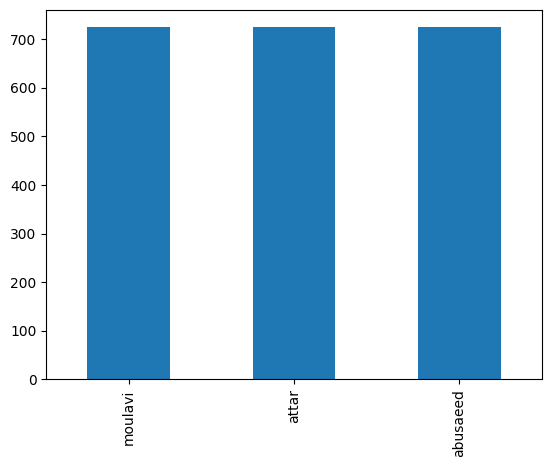

In [ ]:
count = df['poet'].value_counts()

print(count)
count.plot.bar()

In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['abusaeed', 'attar', 'moulavi']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,حلقه گوش دلم باخبر حلقه دل حلقه‌تر زبر چرخ غم ...,moulavi,2
1,بنشین همنشین مردانند دود کدورت ترا بنشانند اند...,moulavi,2
2,دانیکه گوید بانگ رباب اندر بیا ره دریاب خطا بر...,moulavi,2
3,جان چو سمندرم نگاری آتش خوش قراری زان باده لبه...,moulavi,2
4,بیمارم غم امتحانم غم‌تر جوانم طرفه نگر هرچه رن...,moulavi,2
...,...,...,...
2167,خدمت چو عمر دراز گفتم مگر شوم محرم راز کی دانس...,abusaeed,0
2168,تافت عنان صبوری جان خراب همچو ر کاب حلقه چشم ت...,abusaeed,0
2169,ز معبود خبر جمله کاینات سر دریوزه همی مردان ز ...,abusaeed,0
2170,یار خسته میدار دلت دایم امید بسته دلت شکستگان ...,abusaeed,0


In [ ]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'abusaeed': 0, 'attar': 1, 'moulavi': 2}
id2label: {0: 'abusaeed', 1: 'attar', 2: 'moulavi'}


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
val_data, test_data = train_test_split(test_data, test_size=0.1, random_state=1, shuffle=True)

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoConfig, AutoTokenizer

MODEL_NAME = 'HooshvareLab/bert-fa-base-uncased'
config = AutoConfig.from_pretrained(
    MODEL_NAME, **{
        'label2id': label2id,
        'id2label': id2label,
    })
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

max:  46
min:  9


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800'),
  Text(0, 900.0, '900')])

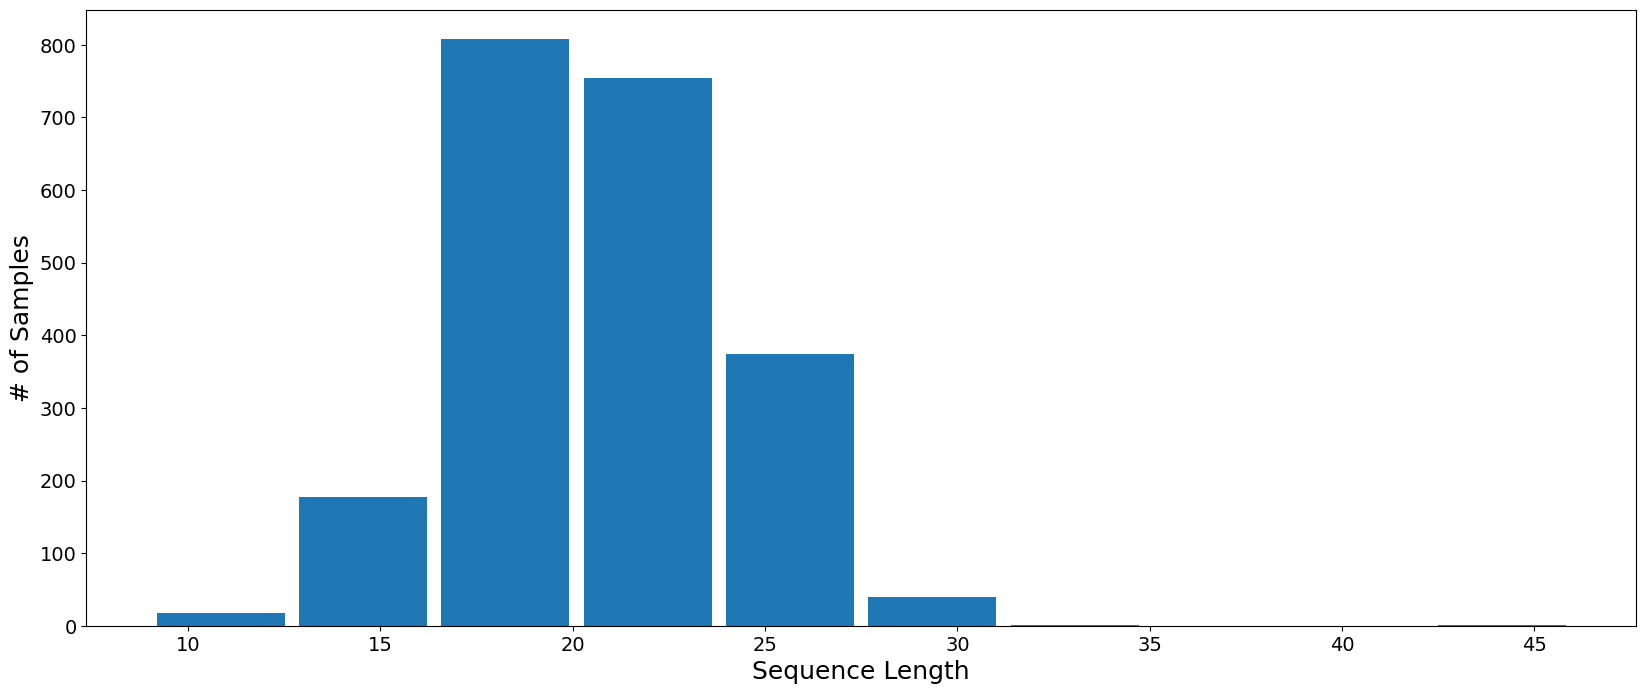

In [ ]:
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.poem.values.tolist(),
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [ ]:
print(config.to_json_string())

{
  "_name_or_path": "HooshvareLab/bert-fa-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "abusaeed",
    "1": "attar",
    "2": "moulavi"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "abusaeed": 0,
    "attar": 1,
    "moulavi": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



In [ ]:
SEQ_LEN = 128
BATCH_SIZE = 16

In [ ]:
tokens = tokenizer(train_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
val_data_tokens = tokenizer(val_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
test_data_tokens = tokenizer(test_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


le = LabelEncoder()
y_train_le = le.fit_transform(train_data['label_id'])
y_valid_le  = le.fit_transform(val_data['label_id'])
y_test_le = le.fit_transform(test_data['label_id'])

hotlabels = to_categorical(y_train_le)
val_labels = to_categorical(y_valid_le)
test_labels = to_categorical(y_test_le)

In [ ]:
y_valid_le  = le.fit_transform(val_data['label_id'])
val_labels = to_categorical(y_valid_le)

In [ ]:
import tensorflow as tf

def map_func(input_ids, attention_mask, labels):
    return ({'input_ids': input_ids,
            'attention_mask': attention_mask}, labels)

# train_size = int((tokens['input_ids'].shape[0] / BATCH_SIZE) * 0.8)

train_dataset = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], hotlabels))
train_dataset = train_dataset.map(map_func)
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)


val_dataset = tf.data.Dataset.from_tensor_slices((val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_labels))
val_dataset = val_dataset.map(map_func)
val_dataset = val_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tokens['input_ids'], test_data_tokens['attention_mask'], test_labels))
test_dataset = test_dataset.map(map_func)
test_dataset = test_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
from transformers import TFAutoModel, TFBertForSequenceClassification
base_model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

# embeddings = AlBertmodel(input_ids, attention_mask=mask)
classificationResult = base_model([input_ids, mask]).logits
# flatten_sent = tf.keras.layers.Flatten()(classificationResult)
Final_output = tf.keras.layers.Dense(3, activation ='softmax', trainable=True)(classificationResult)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=Final_output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_for_sequence_classific  TFSequenceClassifie  162843651  ['input_ids[0][0]',              
 ation (TFBertForSequenceClassi  rOutput(loss=None,               'attention_mask[0][0]']         
 fication)                      logits=(None, 3),                                                 
                                 hidden_states=None                                           

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #learning_rate=1e-4, decay=1e-6
loss= tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
108/108 [==============================] - 106s 494ms/step - loss: 1.0723 - accuracy: 0.4207 - val_loss: 0.9536 - val_accuracy: 0.5521
Epoch 2/5
108/108 [==============================] - 48s 440ms/step - loss: 0.7355 - accuracy: 0.6973 - val_loss: 0.8032 - val_accuracy: 0.6589
Epoch 3/5
108/108 [==============================] - 48s 447ms/step - loss: 0.3850 - accuracy: 0.8617 - val_loss: 1.0562 - val_accuracy: 0.6250
Epoch 4/5
108/108 [==============================] - 48s 446ms/step - loss: 0.1985 - accuracy: 0.9311 - val_loss: 1.2756 - val_accuracy: 0.6302
Epoch 5/5
108/108 [==============================] - 47s 438ms/step - loss: 0.0886 - accuracy: 0.9774 - val_loss: 1.2769 - val_accuracy: 0.6458


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

2/2 [==============================] - 0s 155ms/step - loss: 1.4171 - accuracy: 0.6250


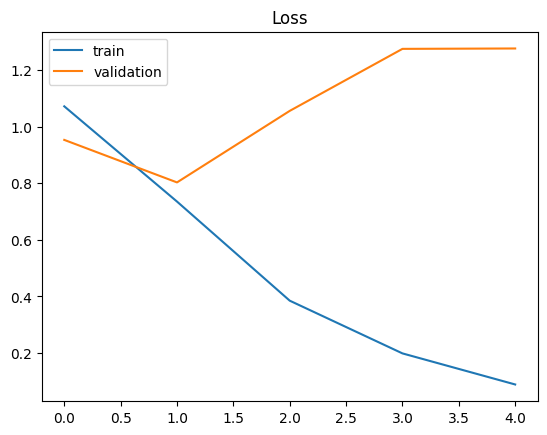

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

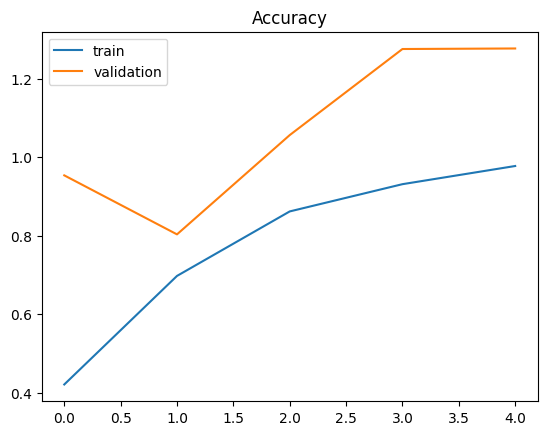

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [ ]:
def prep_data(text):
    tokens = tokenizer(text, max_length=SEQ_LEN, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return ({'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']})

In [ ]:
import numpy as np

test_data['predicted-label'] = None
# i = 0
for i, text in zip(test_data.index, test_data['poem']):
    tokens = prep_data(text)
    probs = model.predict(tokens)
    pred = np.argmax(probs)
    test_data['predicted-label'][i] = pred


In [ ]:
testlist = test_data['label_id'].tolist()
predlist = test_data['predicted-label'].tolist()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(testlist, predlist, target_names=labels))

              precision    recall  f1-score   support

    abusaeed       0.56      0.67      0.61        15
       attar       0.70      0.64      0.67        11
     moulavi       0.69      0.61      0.65        18

    accuracy                           0.64        44
   macro avg       0.65      0.64      0.64        44
weighted avg       0.65      0.64      0.64        44



<Axes: >

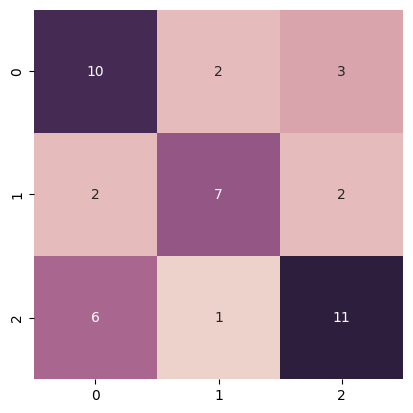

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(testlist, predlist)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)